# **1. Initial Data**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/My Drive/KKPM/covid_id_confirmed.csv')
df

,date,Positif
0,2020-3-16,134
1,2020-3-17,172
2,2020-3-18,227
3,2020-3-19,311
4,2020-3-20,369
5,2020-3-21,450
6,2020-3-22,514
7,2020-3-23,579
8,2020-3-24,686
9,2020-3-25,790


# **2. Data Preprocessing**

In [0]:
df.set_index('date', inplace=True)

In [0]:
def list_min_1(list):
  min_1 = [1]
  for i in range(len(list)-1):
    min_1.append(list[i])
  return min_1

In [5]:
#Menambah kolom Hari (Berisikan hari ke 1, 2, dst)
new_col = np.arange(1, df.shape[0]+1)
df.insert(loc=0, column='Hari', value=new_col)

#Menambah kolom Pos H-1 (Berisikan jumlah positif pada H-1)
h_min_1 = list_min_1(df['Positif'].values.tolist())
df.insert(loc=1, column='Pos H-1', value=h_min_1)

#Menambah kolom Peningkatan (Berisikan jumlah penigkatan dari hari sebelumnya)
df["Peningkatan"] = df["Positif"].diff()
df = df.fillna(1)
df.head(10)

,Hari,Pos H-1,Positif,Peningkatan
date,,,,
2020-3-16,1,1,134,1.0
2020-3-17,2,134,172,38.0
2020-3-18,3,172,227,55.0
2020-3-19,4,227,311,84.0
2020-3-20,5,311,369,58.0
2020-3-21,6,369,450,81.0
2020-3-22,7,450,514,64.0
2020-3-23,8,514,579,65.0
2020-3-24,9,579,686,107.0


# **3. Data Understanding**

## Correlasi Data

In [6]:
print("Corr Hari and Positif\t\t:", df['Hari'].corr(df['Positif']))
print("Corr Hari and Peningkatan\t:", df['Hari'].corr(df['Peningkatan']))
print("Corr Positif hari ini dan\t:", df['Pos H-1'].corr(df['Positif']))

Corr Hari and Positif		: 0.965829733227327
Corr Hari and Peningkatan	: 0.9197812611482625
Corr Positif hari ini dan	: 0.9996671105573532


## Ploting Data

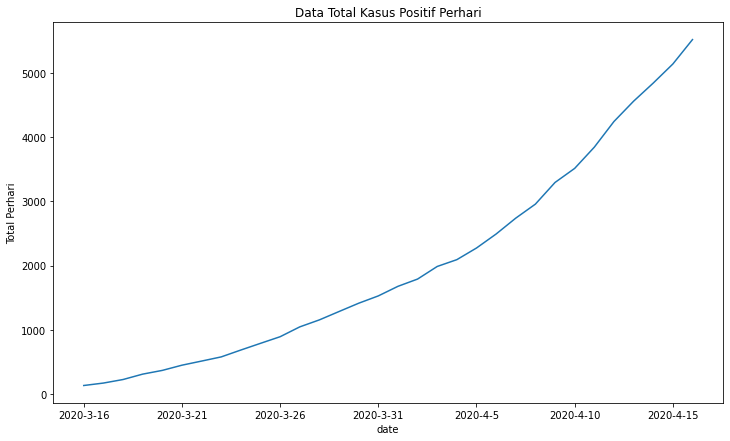

In [7]:
df['Positif'].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Perhari')
plt.title('Data Total Kasus Positif Perhari')
plt.show()

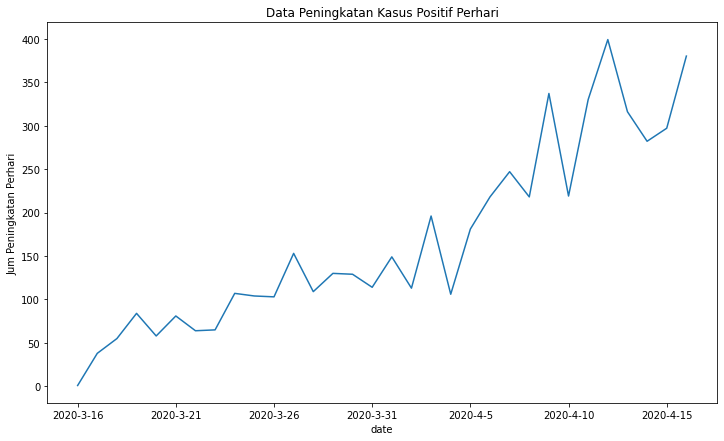

In [8]:
df['Peningkatan'].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Jum Peningkatan Perhari')
plt.title('Data Peningkatan Kasus Positif Perhari')
plt.show()

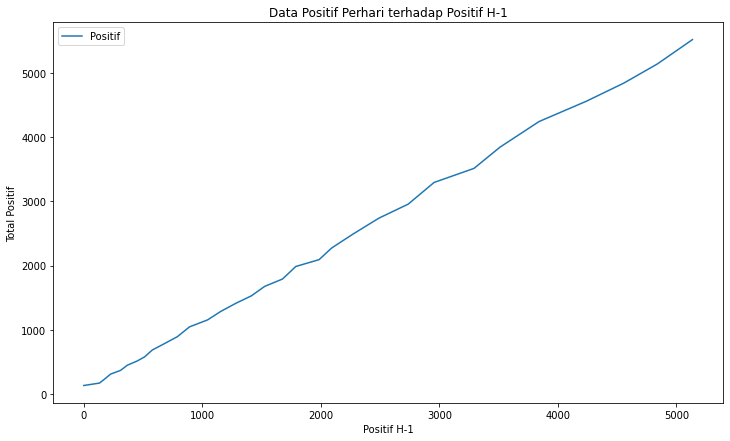

In [9]:
df.plot(x = "Pos H-1", y = 'Positif', kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Positif')
plt.xlabel('Positif H-1')
plt.title('Data Positif Perhari terhadap Positif H-1')
plt.show()

## Describe Data

In [10]:
df[['Positif','Peningkatan']].describe()

,Positif,Peningkatan
count,32.000000,32.000000
mean,2015.375000,168.218750
std,1609.640849,106.863112
min,134.000000,1.000000
25%,659.250000,98.250000
50%,1602.500000,129.500000
75%,3040.250000,226.000000
max,5516.000000,399.000000


In [0]:
df_pos = df[['Hari','Positif']]
df_pen = df[['Hari','Peningkatan']]
df_h_1 = df[['Pos H-1','Positif']]

# **4. Pemodelan**

## **Regresi Linear**

![liner](https://i.ibb.co/dtjHq3G/Linear-aljabar.jpg)

Rumus utama pada Regresi Linier Sederhana :

> $y = ax + b$

dimana :
*   $y$ = Variabel dependen
*   $x$ = Variable independen
*   $a$ = Koefisien / slope (slope adalah tingkat kemiringan garis)
*   $b$ = Konstanta / intercept (intercept adalah jarak titik y pada garis dari titik 0) 


In [0]:
def get_predict(x, a, b):
  return (a * x) + b

Rumus Mencari Koefisien / Slope :
> $ a = \frac{n(\Sigma xy) - (\Sigma x)(\Sigma y)} {n (\Sigma x^2) - (\Sigma x)^2}$


Rumus Mencari Konstanta / intercept :
> $ b = \frac{(\Sigma y)(\Sigma x^2) - (\Sigma x)(\Sigma xy)} {n (\Sigma x^2) - (\Sigma x)^2}$



In [0]:
def get_slope_intercept(df, col_x, col_y):
  n = df.shape[0]
  sig_y = df[col_y].sum()
  sig_x = df[col_x].sum()
  sig_x2 = np.sum([i ** 2 for i in df[col_x].values.tolist()])
  sig_x_2 = sig_x ** 2
  sig_xy = np.sum([i[0] * i[1] for i in zip(df[col_x].values.tolist(), df[col_y].values.tolist())])

  print('Jumlah Data\t: ', n)
  print('Sigma y\t\t: ', sig_y)
  print('Sigma x\t\t: ', sig_x)
  print('Sigma x^2\t: ', sig_x2)
  print('(Sigma x)^2\t: ', sig_x_2)
  print('Sigma xy\t: ', sig_xy)

  a = ((n * sig_xy) - (sig_x * sig_y))/(n*sig_x2-sig_x_2)
  print('\n\nSlope\t\t: ', a)

  b = ((sig_y * sig_x2) - (sig_x *  sig_xy))/(n*sig_x2-sig_x_2)
  print('Intercept\t: ', b)

  return a, b

## Evaluasi
*Mean Squared Error* (MSE)

> $ MSE = \frac{1}{n} \Sigma^n_{i=1} (y_i - y'_i)^2$


In [0]:
def get_mse(actual, predict, n):
  sigma_e_2 = 0
  for i in range(n):
    sigma_e_2 += (actual[i] - predict[i]) ** 2
  mse = sigma_e_2/n
  return mse

*Mean Absolute Error* (MAE)
> $ MAE = \frac{1}{n} \Sigma^n_{i=1} |{y_i - y'_i}|$


In [0]:
def get_mae(actual, predict, n):
  sigma_e_abs = 0
  for i in range(n):
    sigma_e_abs += abs(actual[i] - predict[i])
  mae = sigma_e_abs/n
  return mae

*Mean absolute percentage error* (MAPE)
> $ MAPE = \frac{1}{n} \Sigma^n_{i=1} \frac{|{y_i - y'_i}|}{y_i}$

In [0]:
def get_mape(actual, predict, n):
  sigma_e_per = 0
  for i in range(n):
    sigma_e_per += (abs(actual[i] - predict[i]))/actual[i]
  mape = sigma_e_per/n
  return mape

## Prediksi Berdasarkan Total Perhari

In [17]:
a, b = get_slope_intercept(df_pos, 'Hari', 'Positif')

Jumlah Data	:  32
Sigma y		:  64492
Sigma x		:  528
Sigma x^2	:  11440
(Sigma x)^2	:  278784
Sigma xy	:  1516216


Slope		:  165.72507331378299
Intercept	:  -719.0887096774194


In [18]:
Pred_Pos = [round(get_predict(i, a, b)) for i in np.arange(1, df_pos.shape[0]+1)]
df_pos.insert(loc= 1, column='Pred_Pos', value=Pred_Pos)
df_pos.tail(10)

,Hari,Pred_Pos,Positif
date,,,
2020-4-7,23,3093.0,2738
2020-4-8,24,3258.0,2956
2020-4-9,25,3424.0,3293
2020-4-10,26,3590.0,3512
2020-4-11,27,3755.0,3842
2020-4-12,28,3921.0,4241
2020-4-13,29,4087.0,4557
2020-4-14,30,4253.0,4839
2020-4-15,31,4418.0,5136


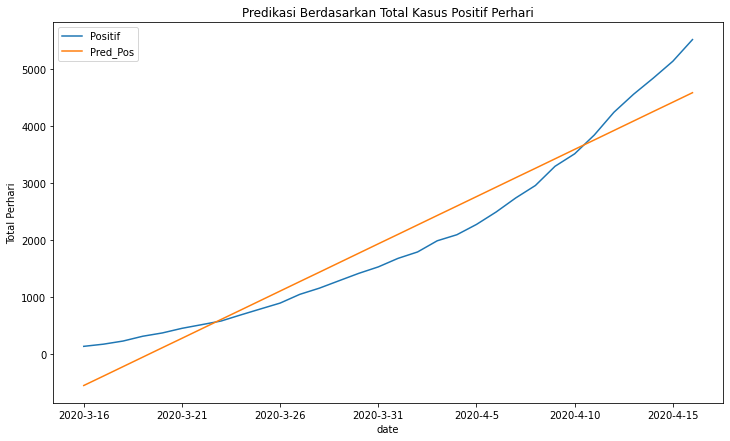

In [19]:
df_pos[['Positif', 'Pred_Pos']].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Perhari')
plt.title('Predikasi Berdasarkan Total Kasus Positif Perhari')
plt.show()

### Evaluasi Prediksi

In [35]:
print("Hasil Evaluasi :")
actual = df_pos['Positif'].values.tolist()
predict = df_pos['Pred_Pos'].values.tolist()
n = df_pos.shape[0]
print("MSE\t: ", get_mse(actual, predict, n))
print("MAE\t: ", get_mae(actual, predict, n))
print("MAPE\t: ", get_mape(actual, predict, n))

Hasil Evaluasi :
MSE	:  168617.3125
MAE	:  355.1875
MAPE	:  0.5275795937145055


### Prediksi 17 s/d 21 April

In [21]:
for n,x in enumerate(range(33, 38)):
  print("Prediksi Kasus Positif ", str(17+n)," April 2020 : ", round(get_predict(x, a, b)))

Prediksi Kasus Positif  17  April 2020 :  4750.0
Prediksi Kasus Positif  18  April 2020 :  4916.0
Prediksi Kasus Positif  19  April 2020 :  5081.0
Prediksi Kasus Positif  20  April 2020 :  5247.0
Prediksi Kasus Positif  21  April 2020 :  5413.0


## Prediksi Berdasarkan Peningkatan Perhari

In [22]:
a1, b1 = get_slope_intercept(df_pen, 'Hari', 'Peningkatan')

Jumlah Data	:  32
Sigma y		:  5383.0
Sigma x		:  528
Sigma x^2	:  11440
(Sigma x)^2	:  278784
Sigma xy	:  117403.0


Slope		:  10.477822580645162
Intercept	:  -4.665322580645161


In [23]:
Pred_Pen = [round(get_predict(i, a1, b1)) for i in np.arange(1, df_pen.shape[0]+1)]
df_pen.insert(loc= 1, column='Pred_Pen', value=Pred_Pen)
df_pen.tail(10)

,Hari,Pred_Pen,Peningkatan
date,,,
2020-4-7,23,236.0,247.0
2020-4-8,24,247.0,218.0
2020-4-9,25,257.0,337.0
2020-4-10,26,268.0,219.0
2020-4-11,27,278.0,330.0
2020-4-12,28,289.0,399.0
2020-4-13,29,299.0,316.0
2020-4-14,30,310.0,282.0
2020-4-15,31,320.0,297.0


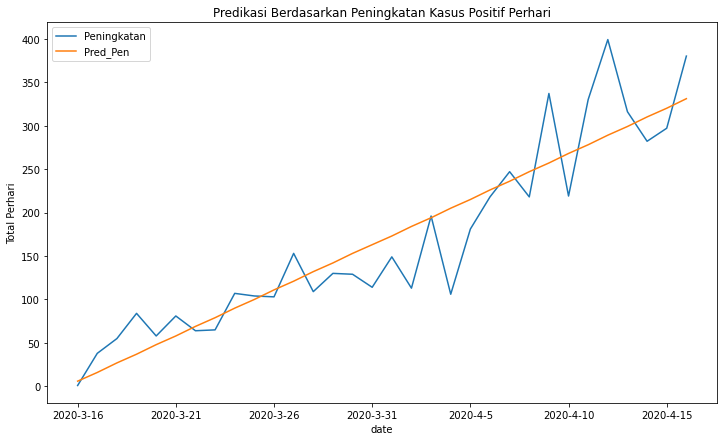

In [24]:
df_pen[['Peningkatan', 'Pred_Pen']].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Perhari')
plt.title('Predikasi Berdasarkan Peningkatan Kasus Positif Perhari')
plt.show()

### Evaluasi Prediksi

In [25]:
print("Hasil Evaluasi :")
actual1 = df_pen['Peningkatan'].values.tolist()
predict1 = df_pen['Pred_Pen'].values.tolist()
n1 = df_pen.shape[0]

print("MSE\t: ", get_mse(actual1, predict1, n1))
print("MAE\t: ", get_mae(actual1, predict1, n1))
print("MAPE\t: ", get_mape(actual1, predict1, n1))

Hasil Evaluasi :
MSE	:  1706.46875
MAE	:  31.53125
MAPE	:  0.38094757060596696


### Prediksi 17 s/d 21 April

In [26]:
pos = df_pos['Positif'][31]
for n,x in enumerate(range(33, 38)):
  pen_predicr = round(get_predict(x, a1, b1))
  if n == 0 :
    pos_predict = pos + pen_predicr
    print("Prediksi Kasus Positif", str(17+n)," April 2020 Meningkat : ", pen_predicr," Menjadi", pos_predict)
  else :
    pos_predict += pen_predicr
    print("Prediksi Kasus Positif", str(17+n)," April 2020 Meningkat : ", pen_predicr," Menjadi", pos_predict)

Prediksi Kasus Positif 17  April 2020 Meningkat :  341.0  Menjadi 5857.0
Prediksi Kasus Positif 18  April 2020 Meningkat :  352.0  Menjadi 6209.0
Prediksi Kasus Positif 19  April 2020 Meningkat :  362.0  Menjadi 6571.0
Prediksi Kasus Positif 20  April 2020 Meningkat :  373.0  Menjadi 6944.0
Prediksi Kasus Positif 21  April 2020 Meningkat :  383.0  Menjadi 7327.0


## Prediksi Berdasarkan Positif H-1

In [27]:
a2, b2 = get_slope_intercept(df_h_1, 'Pos H-1', 'Positif')

Jumlah Data	:  32
Sigma y		:  64492
Sigma x		:  58977
Sigma x^2	:  179868563
(Sigma x)^2	:  3478286529
Sigma xy	:  194443080


Slope		:  1.0619652799411412
Intercept	:  58.13980265347861


In [28]:
Pred_Pos = [round(get_predict(i, a2, b2)) for i in df_h_1['Pos H-1'].values.tolist()]
df_h_1.insert(loc = 2, column='Pred_Pos', value=Pred_Pos)
df_h_1.tail(10)

,Pos H-1,Positif,Pred_Pos
date,,,
2020-4-7,2491,2738,2703.0
2020-4-8,2738,2956,2966.0
2020-4-9,2956,3293,3197.0
2020-4-10,3293,3512,3555.0
2020-4-11,3512,3842,3788.0
2020-4-12,3842,4241,4138.0
2020-4-13,4241,4557,4562.0
2020-4-14,4557,4839,4898.0
2020-4-15,4839,5136,5197.0


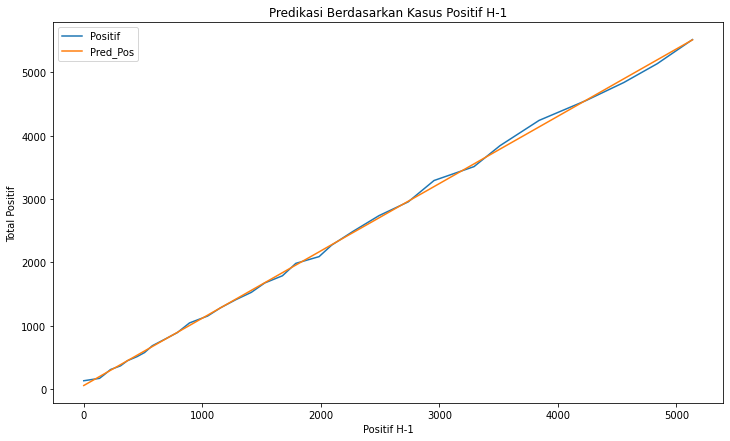

In [29]:
df_h_1.set_index('Pos H-1').plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Positif')
plt.xlabel('Positif H-1')
plt.title('Predikasi Berdasarkan Kasus Positif H-1')
plt.show()

### Evaluasi Prediksi

In [30]:
print("Hasil Evaluasi :")
actual = df_h_1['Positif'].values.tolist()
predict = df_h_1['Pred_Pos'].values.tolist()
n = df_h_1.shape[0]
print("MSE\t: ", get_mse(actual, predict, n))
print("MAE\t: ", get_mae(actual, predict, n))
print("MAPE\t: ", get_mape(actual, predict, n))

Hasil Evaluasi :
MSE	:  1676.65625
MAE	:  30.03125
MAPE	:  0.03990084274190543


### Prediksi 17 s/d 21 April

In [31]:
x = df_h_1['Positif'][31]
for i in range(5):
  print("Prediksi Kasus Positif ", str(17+i)," April 2020 : ", round(get_predict(int(x), a2, b2)))
  x = round(get_predict(int(x), a2, b2))

Prediksi Kasus Positif  17  April 2020 :  5916.0
Prediksi Kasus Positif  18  April 2020 :  6341.0
Prediksi Kasus Positif  19  April 2020 :  6792.0
Prediksi Kasus Positif  20  April 2020 :  7271.0
Prediksi Kasus Positif  21  April 2020 :  7780.0


# **5. Kesimpulan**

**Perbandingan Evaluasi**
> ![alt text](https://i.ibb.co/pvG95DT/Summary-Error.jpg)

**Perbandingan Prediksi**
> ![alt text](https://i.ibb.co/6gzsfwy/Summary-Predic.jpg)

Sampai dengan video ini dibuat data yang yang sudah rilis adalah sampai dengan 17 April 2020, mari kita bandingkan data sebenarnya dan hasil prediksi :

Kasus Aktual Positif 17 April 2020 : **5923**

*   Prediksi Berdasarkan Total Perhari : **4750**
> 5923 - 4750 = 1.173
*   Prediksi Berdasarkan Peningkatan Perhari : **5875**
> 5923 - 5875 = 48
*   Prediksi Berdasarkan Positif H-1 : **5916**
> 5923 - 5916 = 7

Maka disimpulakan model terbaik adalah :

**Prediksi Berdasarkan Positif H-1**




